# Identifying Potential Carbon Storage Facilities

## Import and Procedural Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as cx
import rtree
from zlib import crc32
import hashlib
from shapely.geometry import Point, LineString, Polygon

/Users/jnapolitano/venvs/finance/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
## Importing our DataFrames

gisfilepath = "/Users/jnapolitano/Projects/data/energy/Oil_and_Natural_Gas_Wells.geojson"


fields_df = gpd.read_file(gisfilepath)

#fields_df = fields_df.to_crs(epsg=3857)



## Plot Status Box Plot

<AxesSubplot:>

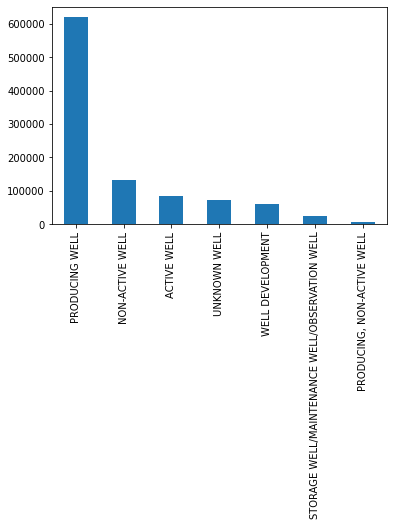

In [4]:
fields_df.STATUS.value_counts().plot(kind='bar')
#data['title'].value_counts()[:20].plot(kind='barh')

### Encode Dataframe to Categorical Variables

In [5]:
#Casting to Category

fields_df["STATUS"] = fields_df["STATUS"].astype('category')

#Creating Cat Column 
fields_df["STAUTS_CAT"] = fields_df["STATUS"].cat.codes
fields_df.head()

,OBJECTID,ID,NAME,STATE,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,...,SURF_LAT,SURF_LONG,BOT_LAT,BOT_LONG,POSREL,FIELD,COMPDATE,TOTDEPTH,geometry,STAUTS_CAT
0,1,W220000001,RRBB NAB PXY RA SU;J L SCALES,LA,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,DE SOTO,22031,USA,32.06496,...,32.06496,-93.55748,-999.0,-999.0,THIRD PARTY,RED RIVER-BULL BAYOU,1951-04-09T00:00:00+00:00,-999.0,POINT (-93.55748 32.06496),1
1,2,W220000002,P SUHH;J B BARR 28,LA,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,DE SOTO,22031,USA,32.08437,...,32.08437,-93.90817,-999.0,-999.0,THIRD PARTY,BETHANY LONGSTREET,2004-06-19T00:00:00+00:00,-999.0,POINT (-93.90817 32.08437),1
2,3,W220000003,HOSS RB SUA;POLAND,LA,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,LINCOLN,22061,USA,32.65100,...,32.65100,-92.74102,-999.0,-999.0,THIRD PARTY,HICO-KNOWLES,2004-07-28T00:00:00+00:00,-999.0,POINT (-92.74102 32.65100),1
3,4,W220000004,LODWICK LUMBER COMPANY,LA,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,BOSSIER,22015,USA,32.60635,...,32.60635,-93.47957,-999.0,-999.0,THIRD PARTY,BELLEVUE,1949-06-09T00:00:00+00:00,-999.0,POINT (-93.47957 32.60635),1
4,5,W220000005,SL 1367,LA,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,LAFOURCHE,22057,USA,29.06883,...,29.06883,-90.17218,-999.0,-999.0,THIRD PARTY,BAY MARCHAND BLOCK 2 OFFSHORE,1950-10-05T00:00:00+00:00,-999.0,POINT (-90.17218 29.06883),1


### Sorting Data by Category

In [6]:
fields_df = fields_df.sort_values(['STAUTS_CAT'])

### Creating Category Table

In [7]:
# Creating a Dictionary of Categories
cat_dict =dict(enumerate(fields_df['STATUS'].cat.categories)) 

# Creating a Dataframe for references
df = pd.DataFrame.from_dict(data=cat_dict,columns=['Category'], orient='index')
df.style

# {0: 'bad', 1: 'good', 2: 'great'}
#grp = fields_df.groupby('STAUTS_CAT')['STATUS'].aggregate(lambda x: print(x))

,Category
0,ACTIVE WELL
1,NON-ACTIVE WELL
2,PRODUCING WELL
3,"PRODUCING, NON-ACTIVE WELL"
4,STORAGE WELL/MAINTENANCE WELL/OBSERVATION WELL
5,UNKNOWN WELL
6,WELL DEVELOPMENT


### Dropping Categories from the Data Frame

#### Active Well

In [8]:
fields_df.drop(fields_df[fields_df['STAUTS_CAT'] == 0].index, inplace = True)


#### Producing Well

In [9]:
fields_df.drop(fields_df[fields_df['STAUTS_CAT'] == 2].index, inplace = True)

#### PRODUCING, NON_ACTIVE WEll

In [10]:
fields_df.drop(fields_df[fields_df['STAUTS_CAT'] == 3].index, inplace = True)


#### Unknown Well

In [11]:
fields_df.drop(fields_df[fields_df['STAUTS_CAT'] == 5].index, inplace = True)


#### Well Development

In [12]:
fields_df.drop(fields_df[fields_df['STAUTS_CAT'] == 6].index, inplace = True)

### Writing filtered DF to CSV 

In [14]:
fields_df.reset_index(inplace=True)
fields_df["STATUS"] = fields_df["STATUS"].astype('string')
fields_df.to_csv("/Users/jnapolitano/Projects/data/energy/non-active-wells.csv")
fields_df.to_file('/Users/jnapolitano/Projects/data/energy/non-active-wells.geojson', driver='GeoJSON')  

/Users/jnapolitano/venvs/finance/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
